In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency, f_oneway, ttest_ind, chi2, kstest


plt.rcParams['figure.figsize'] = [16, 5]
# plt.rcParams['figure.dpi'] = 140
sns.set()

In [ ]:
# load data dan perbaikan tipe data sesuai dengan notebook deskriptif analisis
file = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/03.%20Statistika%20Terapan/Data%20Stater.csv'
raw_df = pd.read_csv(file, parse_dates=["Tanggal Invoice"], thousands=",")
raw_df.columns = [col_name.strip() for col_name in raw_df.columns]
replaceDash = raw_df.Discount.str.replace('-','0')
raw_df.Discount = replaceDash.astype('int64')
raw_df['ID Salesman'] = raw_df['ID Salesman'].astype('object')
raw_df['Jenis Kirim'] = raw_df['Jenis Kirim'].astype('object')
raw_df.head()

,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311


## Correlation and Relationship between Variables

In [ ]:
# fungsi chi2 test yang akan digunakan, didalamnya juga terdapat uji cramer test
def chi2_test(v1, v2, conv_interval = 0.99):
    alpha = 1 - conv_interval
    cont_table = pd.crosstab(v1, v2, margins = False)

    # chi test
    chi_square, p_value, dof, expected = chi2_contingency(cont_table)

    # The p-value approach
    print("Chi Squared Significancy Test")
    conclusion = "Failed to reject the null hypothesis (no correlation between variables)"
    if p_value <= alpha:
        conclusion = "Null Hypothesis (no correlation between variables) is rejected."

    print("chisquare-score is:", chi_square, " and p value is:", p_value)
    print(conclusion)

    # cramer V test
    print("\nCramer V Association Test")
    N = np.sum(cont_table.values)
    minimum_dimension = min(cont_table.shape)-1
    # Calculate Cramer's V
    cramer_value = np.sqrt((chi_square/N) / minimum_dimension)

    if cramer_value < 0.25:
        conclusion = 'Weak'
    elif cramer_value < 0.75:
        conclusion = 'Moderate'
    else:
        conclusion = 'Strong'

    if cramer_value == 0:
        conclusion = 'No'
    elif cramer_value == 1:
        conclusion = 'Perfect'


#     print(dof)
    # Print the result
    print("V =", cramer_value,"\nConclusion:",conclusion,'Association')

### Cek Korelasi

In [ ]:
num_cols = raw_df.describe().columns

raw_df[num_cols].corr()

,Tanggal Invoice,No.Urut,Quantity,Gross sales,Discount,Net sales,Ongkir/Unit,Total Sales
Tanggal Invoice,1.000000,-0.056276,0.031944,-0.025908,-0.047297,0.028015,0.027208,0.028010
No.Urut,-0.056276,1.000000,-0.011824,0.004715,0.012278,-0.016632,-0.003716,-0.016628
Quantity,0.031944,-0.011824,1.000000,0.567569,0.004768,0.661938,0.011376,0.661940
Gross sales,-0.025908,0.004715,0.567569,1.000000,0.207292,0.826150,-0.000422,0.826151
Discount,-0.047297,0.012278,0.004768,0.207292,1.000000,0.060267,-0.004543,0.060255
Net sales,0.028015,-0.016632,0.661938,0.826150,0.060267,1.000000,-0.002797,1.000000
Ongkir/Unit,0.027208,-0.003716,0.011376,-0.000422,-0.004543,-0.002797,1.000000,-0.002593
Total Sales,0.028010,-0.016628,0.661940,0.826151,0.060255,1.000000,-0.002593,1.000000


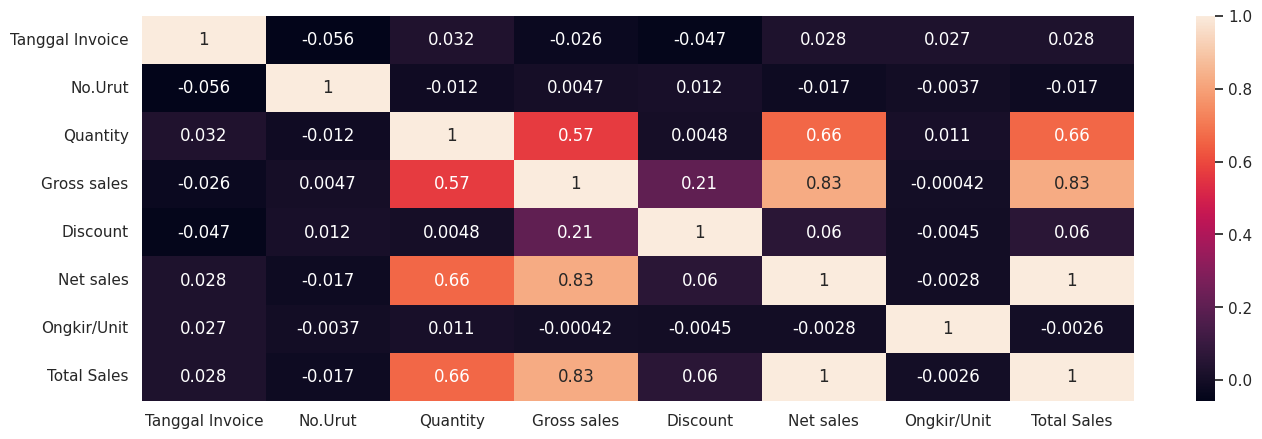

In [ ]:
sns.heatmap(raw_df[num_cols].corr(),annot=True)
plt.show()

In [ ]:
raw_df[num_cols].corr(method='spearman')

,Tanggal Invoice,No.Urut,Quantity,Gross sales,Discount,Net sales,Ongkir/Unit,Total Sales
Tanggal Invoice,1.000000,-0.040934,0.023573,-0.057740,-0.024743,-0.047700,-0.002340,-0.047962
No.Urut,-0.040934,1.000000,0.005436,0.028961,0.028471,0.029779,-0.013961,0.029661
Quantity,0.023573,0.005436,1.000000,0.387671,-0.011387,0.560321,0.013493,0.559562
Gross sales,-0.057740,0.028961,0.387671,1.000000,0.154574,0.969716,0.011632,0.969297
Discount,-0.024743,0.028471,-0.011387,0.154574,1.000000,0.117513,-0.012126,0.118791
Net sales,-0.047700,0.029779,0.560321,0.969716,0.117513,1.000000,0.016205,0.999413
Ongkir/Unit,-0.002340,-0.013961,0.013493,0.011632,-0.012126,0.016205,1.000000,0.027145
Total Sales,-0.047962,0.029661,0.559562,0.969297,0.118791,0.999413,0.027145,1.000000


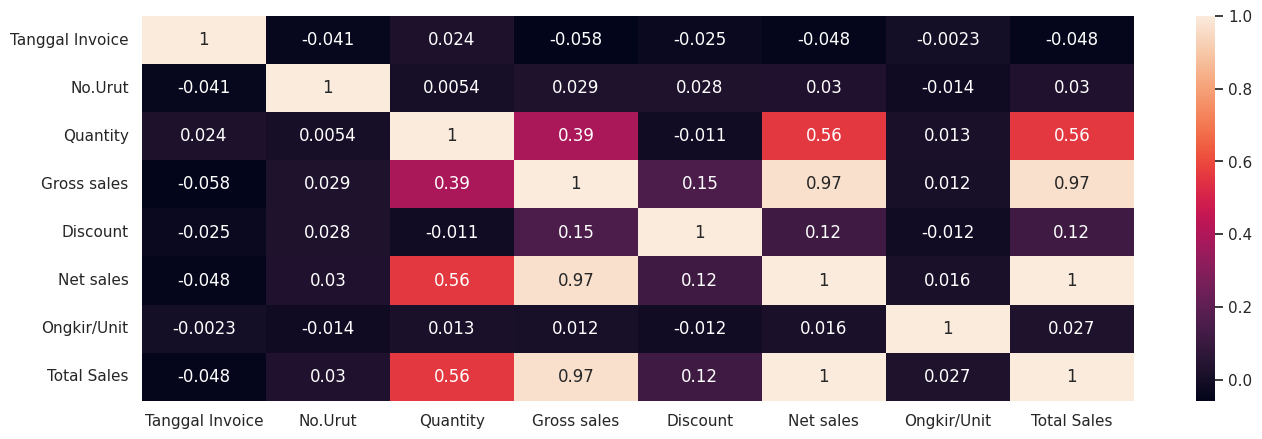

In [ ]:
sns.heatmap(raw_df[num_cols].corr(method='spearman'),annot=True)
plt.show()

In [ ]:
raw_df[num_cols].corr(method='kendall')

,Tanggal Invoice,No.Urut,Quantity,Gross sales,Discount,Net sales,Ongkir/Unit,Total Sales
Tanggal Invoice,1.000000,-0.028162,0.018920,-0.037888,-0.019843,-0.031760,-0.014970,-0.032032
No.Urut,-0.028162,1.000000,0.004505,0.020325,0.023435,0.020806,-0.010370,0.020590
Quantity,0.018920,0.004505,1.000000,0.317204,-0.010942,0.464985,0.011435,0.460575
Gross sales,-0.037888,0.020325,0.317204,1.000000,0.131308,0.917496,0.008357,0.909318
Discount,-0.019843,0.023435,-0.010942,0.131308,1.000000,0.100797,-0.010350,0.101061
Net sales,-0.031760,0.020806,0.464985,0.917496,0.100797,1.000000,0.011557,0.989931
Ongkir/Unit,-0.014970,-0.010370,0.011435,0.008357,-0.010350,0.011557,1.000000,0.020242
Total Sales,-0.032032,0.020590,0.460575,0.909318,0.101061,0.989931,0.020242,1.000000


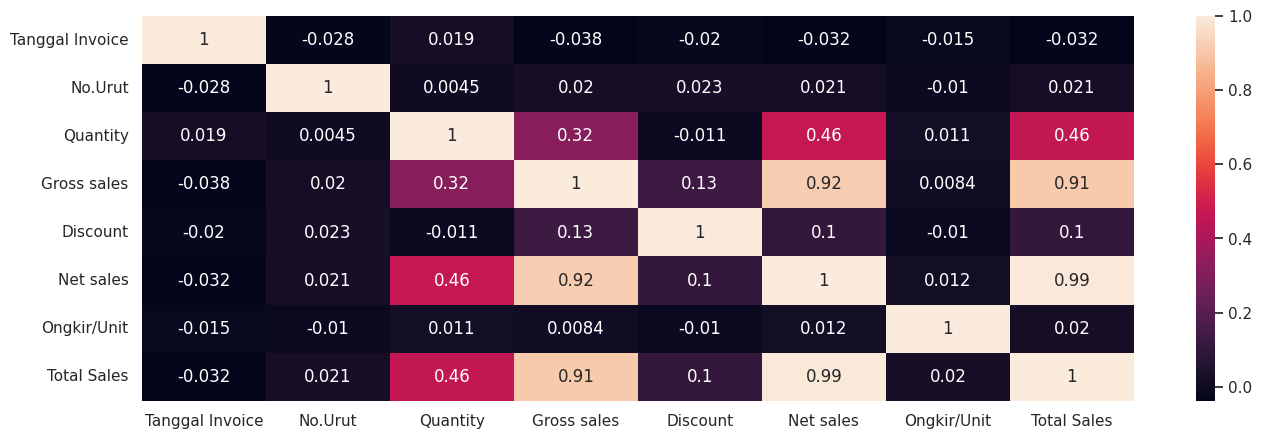

In [ ]:
sns.heatmap(raw_df[num_cols].corr(method='kendall'),annot=True)
plt.show()

### Cek Relationship Categorical

In [ ]:
chi2_test(raw_df['ID Salesman'], raw_df['Jenis Kirim'])

Chi Squared Significancy Test
chisquare-score is: 9.560375098869827  and p value is: 0.3872320585448121
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.05991725142207294 
Conclusion: Weak Association


In [ ]:
chi2_test(raw_df['ID Salesman'], raw_df['Kode Produk'])

Chi Squared Significancy Test
chisquare-score is: 693.8206789238319  and p value is: 0.9999941259046277
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.1701440561110667 
Conclusion: Weak Association


In [ ]:
chi2_test(raw_df['Jenis Kirim'], raw_df['Kode Produk'])

Chi Squared Significancy Test
chisquare-score is: 94.33023116951432  and p value is: 0.5290987951934457
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.18820877419705867 
Conclusion: Weak Association


In [ ]:
chi2_test(raw_df['Nama Pelanggan'], raw_df['ID Salesman'])

Chi Squared Significancy Test
chisquare-score is: 3517.2963499294538  and p value is: 0.0
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.38308720131405266 
Conclusion: Moderate Association


In [ ]:
chi2_test(raw_df['Nama Pelanggan'], raw_df['Kode Produk'])

Chi Squared Significancy Test
chisquare-score is: 3101.5051158788883  and p value is: 1.96049330454749e-05
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.2004018234117868 
Conclusion: Weak Association


In [ ]:
chi2_test(raw_df['Nama Pelanggan'], raw_df['Jenis Kirim'])

Chi Squared Significancy Test
chisquare-score is: 25.688502276981968  and p value is: 0.6420839821251962
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.09821635416608858 
Conclusion: Weak Association


## Uji Normality

In [ ]:
def check_normality(data, alpha = 0.05):
    test_stat_normality, p_value_normality = kstest(data, 'norm')
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < alpha:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [ ]:
check_normality(raw_df['Total Sales'])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [ ]:
check_normality(raw_df['Quantity'])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


array([[<Axes: title={'center': 'No.Urut'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Gross sales'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Net sales'}>,
        <Axes: title={'center': 'Ongkir/Unit'}>],
       [<Axes: title={'center': 'Total Sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

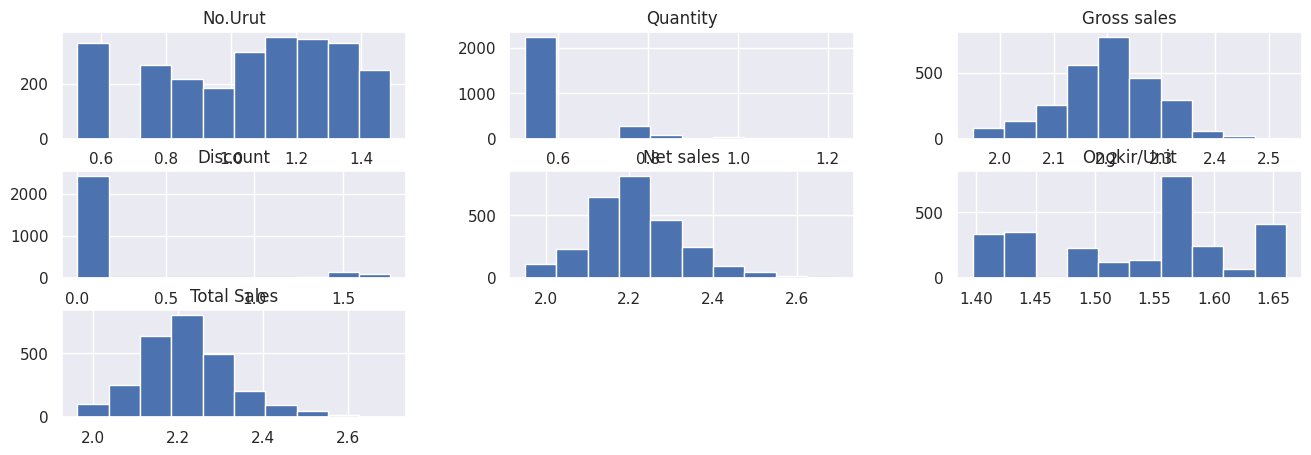

In [ ]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns
transformed = raw_df[numeric_cols].apply(lambda v: np.log1p(np.log1p(v)) , axis=0)
transformed.hist()

In [ ]:
check_normality(transformed['Gross sales'])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


## Uji Hipotesis

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [ ]:
#student t-test
def t_test(data1, data2, alpha = 0.05):
    stat, p = ttest_ind(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

In [ ]:
# cek apakah data gross sales dalam jenis kirim yang berbeda merupakan data yang sama distribusinya

data1 = transformed[raw_df['Jenis Kirim'] == 1]['Gross sales']
data2 = transformed[raw_df['Jenis Kirim'] == 2]['Gross sales']

t_test(data1, data2)

stat=0.822, p=0.411
Probably the same distribution


In [ ]:
def anova_test(data,alpha=0.05):
    print()
    stat, p = f_oneway(*data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

In [ ]:
data1 = transformed[raw_df['Tanggal Invoice'].dt.month == 1]['Gross sales']
data2 = transformed[raw_df['Tanggal Invoice'].dt.month == 4]['Gross sales']
data3 = transformed[raw_df['Tanggal Invoice'].dt.month == 7]['Gross sales']

anova_test([data1, data2,data3])


stat=17.950, p=0.000
Probably different distributions


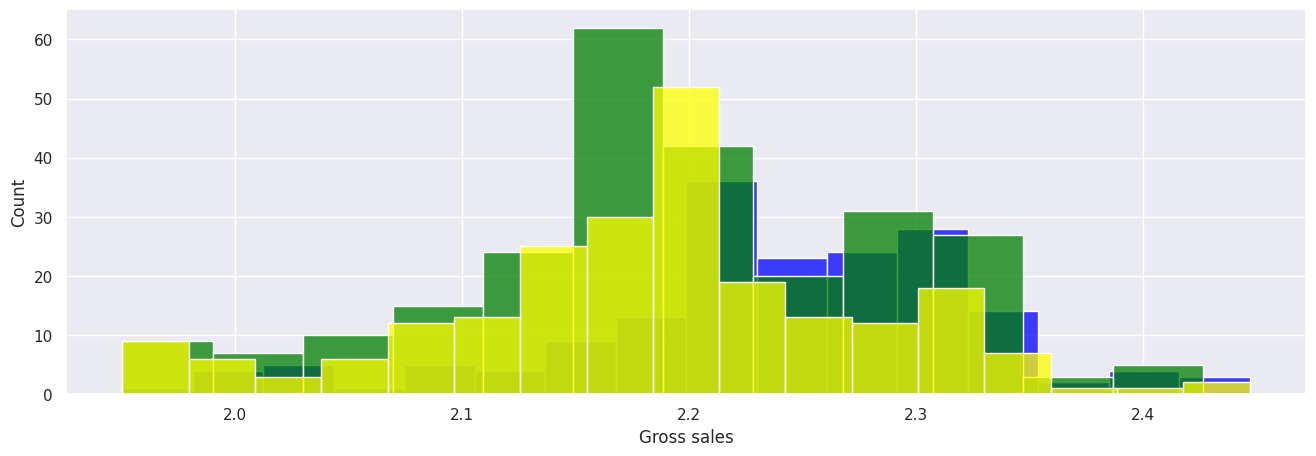

In [ ]:
sns.histplot(data=data1, color='blue')
sns.histplot(data=data2, color='green')
sns.histplot(data=data3, color='yellow')
plt.show()

In [ ]:
!pip install researchpy
import researchpy as rp

In [ ]:
rp.ttest(group1= data1, group1_name= "Kirim 1",
         group2= data2, group2_name= "Kirim 2")

/usr/local/lib/python3.12/dist-packages/researchpy/ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Kirim 1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
/usr/local/lib/python3.12/dist-packages/researchpy/ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (Kirim 1 - Kirim 2) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0   Kirim 1  176.0  2.237834  0.089606  0.006754   2.224504  2.251164
 1   Kirim 2  255.0  2.195494  0.097665  0.006116   2.183449  2.207538
 2  combined  431.0  2.212783  0.096624  0.004654   2.203636  2.221931,
                   Independent t-test   results
 0  Difference (Kirim 1 - Kirim 2) =     0.0423
 1              Degrees of freedom =   429.0000
 2                               t =     4.5740
 3           Two side test p value =     0.0000
 4          Difference < 0 p value =     1.0000
 5          Difference > 0 p value =     0.0000
 6                       Cohen's d =     0.4482
 7                       Hedge's g =     0.4474
 8                  Glass's delta1 =     0.4725
 9                Point-Biserial r =     0.2156)